# Project: Wrangling and Analyze Data

In [1]:
# let's import our libraries and packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
import time
import datetime
import requests
import json
import tweepy
import io
import os

## Data Gathering

In the cell below, gather **all** three pieces of data for this project and load them in the notebook.

**Note:** the methods required to gather each data are different.
    
1. Directly download the WeRateDogs Twitter archive data (twitter-archive-enhanced.csv)    

In [2]:
# Gathering the data

twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Looking at the information in our data
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


2. Use the Requests library to download the image prediction file (image_predictions.tsv)

In [4]:
# URL downloaded programmatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Opening a tsv file and saving the response content
with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)
    
# Read TSV file
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t')

In [5]:
# Looking at the information in our data
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions

# Get the API object which we will use to gather the twitter data
import tweepy

consumer_key = 'SECRET'
consumer_secret = 'SECRET'
access_token = 'SECRET'
access_secret = 'SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [7]:
# Exrtract the IDs from twitter_archive
twitter_archive.tweet_id

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 2356, dtype: int64

In [8]:
# Express the tweet IDs as a list
list(twitter_archive.tweet_id)

[892420643555336193,
 892177421306343426,
 891815181378084864,
 891689557279858688,
 891327558926688256,
 891087950875897856,
 890971913173991426,
 890729181411237888,
 890609185150312448,
 890240255349198849,
 890006608113172480,
 889880896479866881,
 889665388333682689,
 889638837579907072,
 889531135344209921,
 889278841981685760,
 888917238123831296,
 888804989199671297,
 888554962724278272,
 888202515573088257,
 888078434458587136,
 887705289381826560,
 887517139158093824,
 887473957103951883,
 887343217045368832,
 887101392804085760,
 886983233522544640,
 886736880519319552,
 886680336477933568,
 886366144734445568,
 886267009285017600,
 886258384151887873,
 886054160059072513,
 885984800019947520,
 885528943205470208,
 885518971528720385,
 885311592912609280,
 885167619883638784,
 884925521741709313,
 884876753390489601,
 884562892145688576,
 884441805382717440,
 884247878851493888,
 884162670584377345,
 883838122936631299,
 883482846933004288,
 883360690899218434,
 883117836046

In [9]:
# Check the total numbers of tweet IDs
len(list(twitter_archive.tweet_id))

2356

In [10]:
# Using one tweet ID as an example: Get the status of one tweet ID
page = api.get_status(891815181378084864, tweet_mode='extended')

In [11]:
page

Status(_api=<tweepy.api.API object at 0x0000019123807400>, _json={'created_at': 'Mon Jul 31 00:18:03 +0000 2017', 'id': 891815181378084864, 'id_str': '891815181378084864', 'full_text': 'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB', 'truncated': False, 'display_text_range': [0, 121], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg', 'url': 'https://t.co/wUnZnhtVJB', 'display_url': 'pic.twitter.com/wUnZnhtVJB', 'expanded_url': 'https://twitter.com/dog_rates/status/891815181378084864/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 510, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 901, 'h': 

In [12]:
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
tweet_ids

array([892420643555336193, 892177421306343426, 891815181378084864, ...,
       666033412701032449, 666029285002620928, 666020888022790149],
      dtype=int64)

In [13]:
len(tweet_ids)

2356

In [14]:
# Query Twitter's API for the JSON data of each tweet ID in the Twitter archive
index = 0
# dictionary to catch the errors
error_dict = {}
start = time.time()

# Save each tweet's returned JSON as a new line in a .txt file
with open ('tweet_json.txt', 'w') as tweet_bk:
    # This will likely take 20 - 30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        index += 1
        try:
            # Get the status data for each of the tweet IDs
            tweet = api.get_status(tweet_id, tweet_mode = 'extended')
            print(str(index) + ": " + "ID - " + str(tweet_id))
            # Convert each tweet status to JSON string and save it in the tweet_bk file
            json.dump(tweet._json, tweet_bk)
            # recognize \n as a break of text
            tweet_bk.write("\n")
            
        # Catching errors that might occur while accessing the tweet data or content
        except tweepy.TweepyException as error:
            print(str(index) + ": " + "ID - " + str(tweet_id) + " has an error:", error.response.text)
            # Appending the errors to the dictionary; error_dict
            error_dict[tweet_id] = error
            
end = time.time()
print(end - start)

1: ID - 892420643555336193
2: ID - 892177421306343426
3: ID - 891815181378084864
4: ID - 891689557279858688
5: ID - 891327558926688256
6: ID - 891087950875897856
7: ID - 890971913173991426
8: ID - 890729181411237888
9: ID - 890609185150312448
10: ID - 890240255349198849
11: ID - 890006608113172480
12: ID - 889880896479866881
13: ID - 889665388333682689
14: ID - 889638837579907072
15: ID - 889531135344209921
16: ID - 889278841981685760
17: ID - 888917238123831296
18: ID - 888804989199671297
19: ID - 888554962724278272
20: ID - 888202515573088257 has an error: {"errors":[{"code":144,"message":"No status found with that ID."}]}
21: ID - 888078434458587136
22: ID - 887705289381826560
23: ID - 887517139158093824
24: ID - 887473957103951883
25: ID - 887343217045368832
26: ID - 887101392804085760
27: ID - 886983233522544640
28: ID - 886736880519319552
29: ID - 886680336477933568
30: ID - 886366144734445568
31: ID - 886267009285017600
32: ID - 886258384151887873
33: ID - 886054160059072513
34:

254: ID - 844704788403113984 has an error: {"errors":[{"code":144,"message":"No status found with that ID."}]}
255: ID - 844580511645339650
256: ID - 844223788422217728
257: ID - 843981021012017153
258: ID - 843856843873095681
259: ID - 843604394117681152
260: ID - 843235543001513987
261: ID - 842892208864923648 has an error: {"errors":[{"code":144,"message":"No status found with that ID."}]}
262: ID - 842846295480000512
263: ID - 842765311967449089
264: ID - 842535590457499648
265: ID - 842163532590374912
266: ID - 842115215311396866
267: ID - 841833993020538882
268: ID - 841680585030541313
269: ID - 841439858740625411
270: ID - 841320156043304961
271: ID - 841314665196081154
272: ID - 841077006473256960
273: ID - 840761248237133825
274: ID - 840728873075638272
275: ID - 840698636975636481
276: ID - 840696689258311684
277: ID - 840632337062862849
278: ID - 840370681858686976
279: ID - 840268004936019968
280: ID - 839990271299457024
281: ID - 839549326359670784
282: ID - 83929060051192

517: ID - 810984652412424192
518: ID - 810896069567610880
519: ID - 810657578271330305
520: ID - 810284430598270976
521: ID - 810254108431155201
522: ID - 809920764300447744
523: ID - 809808892968534016
524: ID - 809448704142938112
525: ID - 809220051211603969
526: ID - 809084759137812480
527: ID - 808838249661788160
528: ID - 808733504066486276
529: ID - 808501579447930884
530: ID - 808344865868283904
531: ID - 808134635716833280
532: ID - 808106460588765185
533: ID - 808001312164028416
534: ID - 807621403335917568
535: ID - 807106840509214720
536: ID - 807059379405148160
537: ID - 807010152071229440
538: ID - 806629075125202948
539: ID - 806620845233815552
540: ID - 806576416489959424
541: ID - 806542213899489280
542: ID - 806242860592926720
543: ID - 806219024703037440
544: ID - 805958939288408065
545: ID - 805932879469572096
546: ID - 805826884734976000
547: ID - 805823200554876929
548: ID - 805520635690676224
549: ID - 805487436403003392
550: ID - 805207613751304193
551: ID - 8047

792: ID - 773704687002451968
793: ID - 773670353721753600
794: ID - 773547596996571136
795: ID - 773336787167145985
796: ID - 773308824254029826
797: ID - 773247561583001600
798: ID - 773191612633579521
799: ID - 772877495989305348
800: ID - 772826264096874500
801: ID - 772615324260794368
802: ID - 772581559778025472
803: ID - 772193107915964416
804: ID - 772152991789019136
805: ID - 772117678702071809
806: ID - 772114945936949249
807: ID - 772102971039580160
808: ID - 771908950375665664
809: ID - 771770456517009408
810: ID - 771500966810099713
811: ID - 771380798096281600
812: ID - 771171053431250945
813: ID - 771136648247640064
814: ID - 771102124360998913
815: ID - 771014301343748096
816: ID - 771004394259247104 has an error: {"errors":[{"code":179,"message":"Sorry, you are not authorized to see this status."}]}
817: ID - 770787852854652928
818: ID - 770772759874076672
819: ID - 770743923962707968 has an error: {"errors":[{"code":144,"message":"No status found with that ID."}]}
820:

Rate limit reached. Sleeping for: 156


900: ID - 758828659922702336
901: ID - 758740312047005698
902: ID - 758474966123810816
903: ID - 758467244762497024
904: ID - 758405701903519748
905: ID - 758355060040593408
906: ID - 758099635764359168
907: ID - 758041019896193024
908: ID - 757741869644341248
909: ID - 757729163776290825
910: ID - 757725642876129280
911: ID - 757611664640446465
912: ID - 757597904299253760
913: ID - 757596066325864448
914: ID - 757400162377592832
915: ID - 757393109802180609
916: ID - 757354760399941633
917: ID - 756998049151549440
918: ID - 756939218950160384
919: ID - 756651752796094464
920: ID - 756526248105566208
921: ID - 756303284449767430
922: ID - 756288534030475264
923: ID - 756275833623502848
924: ID - 755955933503782912
925: ID - 755206590534418437
926: ID - 755110668769038337
927: ID - 754874841593970688
928: ID - 754856583969079297
929: ID - 754747087846248448
930: ID - 754482103782404096
931: ID - 754449512966619136
932: ID - 754120377874386944
933: ID - 754011816964026368 has an error: 

1174: ID - 720340705894408192
1175: ID - 720059472081784833
1176: ID - 720043174954147842
1177: ID - 719991154352222208
1178: ID - 719704490224398336
1179: ID - 719551379208073216
1180: ID - 719367763014393856
1181: ID - 719339463458033665
1182: ID - 719332531645071360
1183: ID - 718971898235854848
1184: ID - 718939241951195136
1185: ID - 718631497683582976
1186: ID - 718613305783398402
1187: ID - 718540630683709445
1188: ID - 718460005985447936
1189: ID - 718454725339934721
1190: ID - 718246886998687744
1191: ID - 718234618122661888
1192: ID - 717841801130979328
1193: ID - 717790033953034240
1194: ID - 717537687239008257
1195: ID - 717428917016076293
1196: ID - 717421804990701568
1197: ID - 717047459982213120
1198: ID - 717009362452090881
1199: ID - 716802964044845056
1200: ID - 716791146589110272
1201: ID - 716730379797970944
1202: ID - 716447146686459905
1203: ID - 716439118184652801
1204: ID - 716285507865542656
1205: ID - 716080869887381504
1206: ID - 715928423106027520
1207: ID -

1448: ID - 696488710901260288
1449: ID - 696405997980676096
1450: ID - 696100768806522880
1451: ID - 695816827381944320
1452: ID - 695794761660297217
1453: ID - 695767669421768709
1454: ID - 695629776980148225
1455: ID - 695446424020918272
1456: ID - 695409464418041856
1457: ID - 695314793360662529
1458: ID - 695095422348574720
1459: ID - 695074328191332352
1460: ID - 695064344191721472
1461: ID - 695051054296211456
1462: ID - 694925794720792577
1463: ID - 694905863685980160
1464: ID - 694669722378485760
1465: ID - 694356675654983680
1466: ID - 694352839993344000
1467: ID - 694342028726001664
1468: ID - 694329668942569472
1469: ID - 694206574471057408
1470: ID - 694183373896572928
1471: ID - 694001791655137281
1472: ID - 693993230313091072
1473: ID - 693942351086120961
1474: ID - 693647888581312512
1475: ID - 693644216740769793
1476: ID - 693642232151285760
1477: ID - 693629975228977152
1478: ID - 693622659251335168
1479: ID - 693590843962331137
1480: ID - 693582294167244802
1481: ID -

1722: ID - 680130881361686529
1723: ID - 680115823365742593
1724: ID - 680100725817409536
1725: ID - 680085611152338944
1726: ID - 680070545539371008
1727: ID - 680055455951884288 has an error: {"errors":[{"code":144,"message":"No status found with that ID."}]}
1728: ID - 679877062409191424
1729: ID - 679872969355714560
1730: ID - 679862121895714818
1731: ID - 679854723806179328
1732: ID - 679844490799091713
1733: ID - 679828447187857408
1734: ID - 679777920601223168
1735: ID - 679736210798047232
1736: ID - 679729593985699840
1737: ID - 679722016581222400
1738: ID - 679530280114372609
1739: ID - 679527802031484928
1740: ID - 679511351870550016
1741: ID - 679503373272485890
1742: ID - 679475951516934144
1743: ID - 679462823135686656
1744: ID - 679405845277462528
1745: ID - 679158373988876288
1746: ID - 679148763231985668
1747: ID - 679132435750195208
1748: ID - 679111216690831360
1749: ID - 679062614270468097
1750: ID - 679047485189439488
1751: ID - 679001094530465792
1752: ID - 6789917

Rate limit reached. Sleeping for: 103


1800: ID - 677187300187611136
1801: ID - 676975532580409345
1802: ID - 676957860086095872
1803: ID - 676949632774234114
1804: ID - 676948236477857792
1805: ID - 676946864479084545
1806: ID - 676942428000112642
1807: ID - 676936541936185344
1808: ID - 676916996760600576
1809: ID - 676897532954456065
1810: ID - 676864501615042560
1811: ID - 676821958043033607
1812: ID - 676819651066732545
1813: ID - 676811746707918848
1814: ID - 676776431406465024
1815: ID - 676617503762681856
1816: ID - 676613908052996102
1817: ID - 676606785097199616
1818: ID - 676603393314578432
1819: ID - 676593408224403456
1820: ID - 676590572941893632
1821: ID - 676588346097852417
1822: ID - 676582956622721024
1823: ID - 676575501977128964
1824: ID - 676533798876651520
1825: ID - 676496375194980353
1826: ID - 676470639084101634
1827: ID - 676440007570247681
1828: ID - 676430933382295552
1829: ID - 676263575653122048
1830: ID - 676237365392908289
1831: ID - 676219687039057920
1832: ID - 676215927814406144
1833: ID -

2074: ID - 670995969505435648
2075: ID - 670842764863651840
2076: ID - 670840546554966016
2077: ID - 670838202509447168
2078: ID - 670833812859932673
2079: ID - 670832455012716544
2080: ID - 670826280409919488
2081: ID - 670823764196741120
2082: ID - 670822709593571328
2083: ID - 670815497391357952
2084: ID - 670811965569282048
2085: ID - 670807719151067136
2086: ID - 670804601705242624
2087: ID - 670803562457407488
2088: ID - 670797304698376195
2089: ID - 670792680469889025
2090: ID - 670789397210615808
2091: ID - 670786190031921152
2092: ID - 670783437142401025
2093: ID - 670782429121134593
2094: ID - 670780561024270336
2095: ID - 670778058496974848
2096: ID - 670764103623966721
2097: ID - 670755717859713024
2098: ID - 670733412878163972
2099: ID - 670727704916926465
2100: ID - 670717338665226240
2101: ID - 670704688707301377
2102: ID - 670691627984359425
2103: ID - 670679630144274432
2104: ID - 670676092097810432
2105: ID - 670668383499735048
2106: ID - 670474236058800128
2107: ID -

2348: ID - 666057090499244032
2349: ID - 666055525042405380
2350: ID - 666051853826850816
2351: ID - 666050758794694657
2352: ID - 666049248165822465
2353: ID - 666044226329800704
2354: ID - 666033412701032449
2355: ID - 666029285002620928
2356: ID - 666020888022790149
2323.783416748047


In [15]:
print(error_dict)

{888202515573088257: NotFound('404 Not Found\n144 - No status found with that ID.'), 873697596434513921: NotFound('404 Not Found\n144 - No status found with that ID.'), 872668790621863937: NotFound('404 Not Found\n144 - No status found with that ID.'), 872261713294495745: NotFound('404 Not Found\n144 - No status found with that ID.'), 869988702071779329: NotFound('404 Not Found\n144 - No status found with that ID.'), 866816280283807744: NotFound('404 Not Found\n144 - No status found with that ID.'), 861769973181624320: NotFound('404 Not Found\n144 - No status found with that ID.'), 856602993587888130: NotFound('404 Not Found\n144 - No status found with that ID.'), 856330835276025856: NotFound('404 Not Found\n34 - Sorry, that page does not exist.'), 851953902622658560: NotFound('404 Not Found\n144 - No status found with that ID.'), 851861385021730816: NotFound('404 Not Found\n144 - No status found with that ID.'), 845459076796616705: NotFound('404 Not Found\n144 - No status found with t

In [16]:
# Extract the missing columns from enhanced twitter archive

# Empty list to convert to DataFrame
df_list = []

# Open text file for reading
with open ('tweet_json.txt', 'r') as json_file:
    for line in json_file.readlines():
        # Read each JSON string status into a dictionary and reading each line as a dictionary
        each_tweet_line = json.loads(line)
        # Getting the required parameters
        tweet_id = each_tweet_line['id']
        retwt_count = each_tweet_line['retweet_count']
        fav_count = each_tweet_line['favorite_count']
        follows_count = each_tweet_line['user']['followers_count']
        frnds_count = each_tweet_line['user']['friends_count']
        
        df_list.append({'id': tweet_id,
                       'retweet_count': retwt_count,
                       'favorite_count': fav_count,
                       'followers_count': follows_count,
                       'friends_count': frnds_count})
        
tweet_json = pd.DataFrame(df_list, columns=['id', 'retweet_count', 'favorite_count', 'followers_count', 'friends_count'])

In [17]:
df_list

[{'id': 892420643555336193,
  'retweet_count': 7010,
  'favorite_count': 33823,
  'followers_count': 9274595,
  'friends_count': 21},
 {'id': 892177421306343426,
  'retweet_count': 5302,
  'favorite_count': 29338,
  'followers_count': 9274595,
  'friends_count': 21},
 {'id': 891815181378084864,
  'retweet_count': 3482,
  'favorite_count': 22069,
  'followers_count': 9274595,
  'friends_count': 21},
 {'id': 891689557279858688,
  'retweet_count': 7228,
  'favorite_count': 36948,
  'followers_count': 9274595,
  'friends_count': 21},
 {'id': 891327558926688256,
  'retweet_count': 7764,
  'favorite_count': 35320,
  'followers_count': 9274595,
  'friends_count': 21},
 {'id': 891087950875897856,
  'retweet_count': 2602,
  'favorite_count': 17815,
  'followers_count': 9274595,
  'friends_count': 21},
 {'id': 890971913173991426,
  'retweet_count': 1666,
  'favorite_count': 10368,
  'followers_count': 9274595,
  'friends_count': 21},
 {'id': 890729181411237888,
  'retweet_count': 15759,
  'favor

In [18]:
tweet_json

,id,retweet_count,favorite_count,followers_count,friends_count
0,892420643555336193,7010,33823,9274595,21
1,892177421306343426,5302,29338,9274595,21
2,891815181378084864,3482,22069,9274595,21
3,891689557279858688,7228,36948,9274595,21
4,891327558926688256,7764,35320,9274595,21
...,...,...,...,...,...
2322,666049248165822465,37,89,9274641,21
2323,666044226329800704,115,247,9274641,21
2324,666033412701032449,36,100,9274641,21
2325,666029285002620928,39,112,9274641,21


## Data Assessing

In this section, detect and document at least **eight (8) quality and two (2) tidiness issues.** You must use **both** visual sssessment and programmatic assessment to assess the data.

**Note**: pay attention to the following key points when you access the data.
    
 - You only want original ratings (no retweets) that have images. Though there are 5000+ tweeets in the dataset, not all are dog ratings and some are retweets.

 - Accessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
    
 - The fact that rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.

 - You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

### Visual Assessment

Each piece of gathered data is displayed in the Jupyter Notebook for visual assesment purposes.

In [19]:
df1 = twitter_archive

#### twitter_archive columns description:

 - **tweet_id**: the unique identifier for each tweet
    
 - **in_reply_to_status_id**: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID
 
 - **in_reply_to_user_id**: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID
 
 - **timestamp**: time when this Tweet was created
    
 - **source**: utility used to post the Tweet, as an HTML-formatted string. e.g. Twitter for Android, Twitter for iPhone, Twitter Web Client
 
 - **text**: actual UTF-8 text of the status update
    
 - **retweeted_status_id**: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s ID
    
 - **retweeted_status_user_id**: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s author ID
    
 - **retweeted_status_timestamp**: time of retweet
    
 - **expanded_urls**: tweet URL
    
 - **rating_numerator**: numerator of the rating of a dog. Note: ratings almost always greater than 10
        
 - **rating_denominator**: denominator of the rating of a dog. Note: ratings almost always have a denominator of 10
        
 - **name**: name of the dog
    
 - **doggo**: one of the 4 dog "stage"
    
 - **floofer**: one of the 4 dog "stage"
    
 - **pupper**: one of the 4 dog "stage"
    
 - **puppo**: one of the 4 dog "stageColumns description:

In [20]:
# Looking at the information in our twitter_archive data
df1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [21]:
df2 = image_prediction

#### image_prediction columns description:

 - **tweet_id**: the unique identifier for each tweet
    
 - **jpg_url**: dog's image URL
    
 - **img_num**: the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images)
    
 - **p1**: algorithm's #1 prediction for the image in the tweet
    
 - **p1_conf**: how confident the algorithm is in its #1 prediction
    
 - **p1_dog**: whether or not the #1 prediction is a breed of dog
    
 - **p2**: algorithm's #2 prediction for the image in the tweet
    
 - **p2_conf**: how confident the algorithm is in its #2 prediction
    
 - **p2_dog**: whether or not the #2 prediction is a breed of dog
    
 - **p3**: algorithm's #3 prediction for the image in the tweet
    
 - **p3_conf**: how confident the algorithm is in its #3 prediction
    
 - **p3_dog**: whether or not the #3 prediction is a breed of dog

In [22]:
# Looking at the information in our image_prediction data
df2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [23]:
df3 = tweet_json

#### tweet_json columns description

 - **id**: the unique identifier for each tweet
        
 - **retweet_count**: the number of times the original tweet was retweeted
    
 - **favorite_count**: the number of times the the original tweet was loved or liked
    
 - **followers_count**: the number of followers of WeRataeDogs account as at the time of the each tweet
    
 - **friends_count**: the number of profiles WeRateDogs account was following at the time of each tweet

In [24]:
# Looking at the information in our tweet_json data
df3

,id,retweet_count,favorite_count,followers_count,friends_count
0,892420643555336193,7010,33823,9274595,21
1,892177421306343426,5302,29338,9274595,21
2,891815181378084864,3482,22069,9274595,21
3,891689557279858688,7228,36948,9274595,21
4,891327558926688256,7764,35320,9274595,21
...,...,...,...,...,...
2322,666049248165822465,37,89,9274641,21
2323,666044226329800704,115,247,9274641,21
2324,666033412701032449,36,100,9274641,21
2325,666029285002620928,39,112,9274641,21


### Programmatic Assessment

Using pandas' functions and/or methods to assess each gathered data.

In [25]:
# Looking at the concise summary of our twitter_archive data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [26]:
# Looking at the concise summary of our image_prediction data
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
# Looking at the concise summary of our tweet_json data
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               2327 non-null   int64
 1   retweet_count    2327 non-null   int64
 2   favorite_count   2327 non-null   int64
 3   followers_count  2327 non-null   int64
 4   friends_count    2327 non-null   int64
dtypes: int64(5)
memory usage: 91.0 KB


In [28]:
# Looking at the statistical description of our twitter_archive data
df1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [29]:
# Looking at the statistical description of our image_prediction data
df2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [30]:
# Looking at the statistical description of our tweet_json data
df3.describe()

,id,retweet_count,favorite_count,followers_count,friends_count
count,2.327000e+03,2327.000000,2327.00000,2.327000e+03,2327.0
mean,7.417930e+17,2472.221745,7057.13107,9.274630e+06,21.0
std,6.820795e+16,4186.692925,10966.36728,6.101647e+01,0.0
min,6.660209e+17,1.000000,0.00000,9.274595e+06,21.0
25%,6.781394e+17,495.000000,1226.00000,9.274612e+06,21.0
50%,7.178418e+17,1149.000000,3053.00000,9.274627e+06,21.0
75%,7.986547e+17,2862.500000,8610.50000,9.274632e+06,21.0
max,8.924206e+17,70778.000000,144938.00000,9.275116e+06,21.0


In [31]:
# looking at a few rows of our twitter_archive data to check out relevant issues
df1.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
829,768909767477751808,NaN,NaN,2016-08-25 20:35:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: When it's Janet from accounting...,7.001438e+17,4.196984e+09,2016-02-18 02:24:13 +0000,https://twitter.com/dog_rates/status/700143752...,10,10,None,None,None,pupper,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
1157,724405726123311104,NaN,NaN,2016-04-25 01:12:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ashleigh. She's having Coachella withd...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/724405726...,10,10,Ashleigh,None,None,pupper,None
654,791821351946420224,NaN,NaN,2016-10-28 01:58:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This little fella really hates ...,6.848310e+17,4.196984e+09,2016-01-06 20:16:44 +0000,"https://vine.co/v/eEZXZI1rqxX,https://vine.co/...",13,10,None,None,None,pupper,None
2045,671528761649688577,NaN,NaN,2015-12-01 03:18:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He's in the middle of a serious conv...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671528761...,10,10,Jax,None,None,None,None


In [32]:
# looking at a few rows of our image_prediction data to check out relevant issues
df2.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1821,834574053763584002,https://pbs.twimg.com/media/C5UAqgyXAAAbMWH.jpg,1,toilet_tissue,0.262936,False,golden_retriever,0.226564,True,bathtub,0.078879,False
1534,790277117346975746,https://pbs.twimg.com/media/Cveg1-NXgAASaaT.jpg,1,Labrador_retriever,0.427742,True,Great_Dane,0.190503,True,curly-coated_retriever,0.146427,True
1720,819347104292290561,https://pbs.twimg.com/media/C17n1nrWQAIErU3.jpg,3,Rottweiler,0.909106,True,black-and-tan_coonhound,0.044120,True,Doberman,0.031835,True
871,697943111201378304,https://pbs.twimg.com/media/Ca-XjfiUsAAUa8f.jpg,1,Great_Dane,0.126924,True,Greater_Swiss_Mountain_dog,0.110037,True,German_short-haired_pointer,0.090816,True
1739,822462944365645825,https://pbs.twimg.com/media/C2n5rUUXEAIXAtv.jpg,3,Pomeranian,0.960199,True,Samoyed,0.023056,True,Maltese_dog,0.008945,True


In [33]:
# looking at a few rows of our tweet_json data to check out relevant issues
df3.sample(5)

,id,retweet_count,favorite_count,followers_count,friends_count
666,788070120937619456,3217,0,9274615,21
2122,669682095984410625,116,312,9274637,21
557,800855607700029440,1520,0,9274610,21
806,768855141948723200,827,3941,9274618,21
178,856282028240666624,5586,25264,9274599,21


In [34]:
# Get the number of rows and columns in twitter_archive dataframe
df1.shape

(2356, 17)

In [35]:
# Get the number of rows and columns in image_prediction dataframe
df2.shape

(2075, 12)

In [36]:
# Get the number of rows and columns in tweet_json dataframe
df3.shape

(2327, 5)

In [37]:
# Get the number of missing values in our twitter_archive data
df1.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [38]:
# Get the number of missing values in our image_prediction data
df2.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [39]:
# Get the number of missing values in our tweet_json data
df3.isnull().sum()

id                 0
retweet_count      0
favorite_count     0
followers_count    0
friends_count      0
dtype: int64

In [40]:
# Get the numbe rof unique values in the columns in our twitter_archive data
df1.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [41]:
# Get the number of unique values in the columns in our image_prediction data
df2.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [42]:
# Get the number of unique values in the columns in our tweet_json data
df3.nunique()

id                 2327
retweet_count      1657
favorite_count     1974
followers_count      78
friends_count         1
dtype: int64

In [43]:
# Get the number of duplicate rows in our twitter_archive data
df1.duplicated().sum()

0

In [44]:
# Get the number of duplicate rows in our image_prediction data
df2.duplicated().sum()

0

In [45]:
# Get the number of duplicate rows in our tweet_json data
df3.duplicated().sum()

0

In [46]:
# Getting the name of the columns
df1.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [47]:
# Checking for IDs with values in retweet_status_id, retweeted_status_user_id, and
# retweeted_status_timestamp columns
df1[df1['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [48]:
df1.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [49]:
df1.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [50]:
df1.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Quality issues

#### twitter_archive (df1)

 - There are tweet IDs that have 'retweeted_status_id, retweeted_status_user _id, and retweeted_status _timestamp values. These ids are that of retweets and won't be used for our analysis
 
 
 - retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp columns contain mostly missing values
 
 
 - in_reply_to_status_id and in_reply_to_user_id columns contain mostly missing values
 
 
 - missing values in expanded_urls column


 - Erroneous data type (timestamp column is in int instead of datetime)
 
 
 - Erroneous data type (tweet id column is in int instead of string)
 
 
 - 'name' values that are all lowercase are invalid entries (i.e. not dog names). Confirmed that the dogs names that started with a lower case are not dog names

 
#### image_predictions (df2)

 - Erroneous data type (tweet id column is in int instead of string)
 
 
 - Values in columns 'p1', 'p2', and 'p3' don't have consistent format
 
 
#### tweet_json (df3)
 
 - Erroneous data type (tweet id column is in int instead of string)

### Tidiness issues

#### twitter_archive (df1)

 - 4 columns (doggo, floofer, pupper, puppo) are categories of dog 'stage' and need to be one column 'stage' with 4 categories: doggo, floofer, pupper and puppo in it.
  
 
#### tweet_json (df3)

 - followers_count column has only 24 values and and friends_count columns contains only 1 value.
 
 
#### General

 - The column label for tweet IDs should be the same across the three datasets.
 
 
 - The three tables should be combined as one single dataset

## Data Cleaning

In this section, clean all of the issues you documented while assessing.

**Note**: Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [51]:
# Make copies of original pieces of data
df1_clean = df1.copy()
df2_clean = df2.copy()
df3_clean = df3.copy()

### Missing Values

**Issue #1**

There are tweet IDs that have 'retweeted_status_id, retweeted_status_user _id, and retweeted_status _timestamp values. These ids are that of retweets and won't be used for our analysis.

**Define**:

Remove tweet IDs that have 'retweeted_status_id, retweeted_status_user _id, and retweeted_status _timestamp values. These ids are that of retweets and won't be used for our analysis.

**Code**:

In [52]:
# Drop retweeted rows
df1_clean = df1_clean[df1_clean.retweeted_status_id.isnull()]
df1_clean = df1_clean[df1_clean.retweeted_status_user_id.isnull()]
df1_clean = df1_clean[df1_clean.retweeted_status_timestamp.isnull()]

**Test**:

In [53]:
# Check if the retweets have been droped
print(df1_clean.retweeted_status_id.notnull().sum())
print(df1_clean.retweeted_status_user_id.notnull().sum())
print(df1_clean.retweeted_status_timestamp.notnull().sum())

0
0
0


**Isuue #2, #3 and #4**:

retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp columns contain mostly missing values.

in_reply_to_status_id and in_reply_to_user_id columns contain mostly missing values.

missing values in expanded_urls column

**Define**:
    
Drop retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id and in_reply_to_user_id columns because they have over 90% of missing values each

Drop the expanded_urls column as it won't be useful for our analysis.

**Code**:

In [54]:
# Make a list of the columns to be dropped
drop_list = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', \
             'retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls']

# Drop the columns 
df1_clean.drop(drop_list, axis=1, inplace=True)

**Test**:

In [55]:
# Check our cleaning effort to confirm if the columns have been dropped
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   rating_numerator    2175 non-null   int64 
 5   rating_denominator  2175 non-null   int64 
 6   name                2175 non-null   object
 7   doggo               2175 non-null   object
 8   floofer             2175 non-null   object
 9   pupper              2175 non-null   object
 10  puppo               2175 non-null   object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


In [56]:
# Check our cleaning effort to confirm if we no longer have missing values
df1_clean.isnull().sum()

tweet_id              0
timestamp             0
source                0
text                  0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

**Yeahhhhhh!!!!**

### Tidiness issues

**Issue #5**:

4 columns (doggo, floofer, pupper, puppo) are categories of dog 'stage' and need to be one column 'stage' with 4 categories: doggo, floofer, pupper and puppo in it.

**Define**:

Create a new variable – ‘stage’ to show the four dog stages, drop the four columns, and fill the empty with NaN.

**Code**:

In [57]:
# First replace None in stage columns with empty string as follows
df1_clean.doggo.replace('None', '', inplace=True)
df1_clean.floofer.replace('None', '', inplace=True)
df1_clean.pupper.replace('None', '', inplace=True)
df1_clean.puppo.replace('None', '', inplace=True)

# Then combine stage columns
df1_clean['stage'] = df1_clean.doggo + df1_clean.floofer + df1_clean.pupper + df1_clean.puppo


# Then format entries with multiple dog stages which appeared like doggopuppo
df1_clean.loc[df1_clean.stage == 'doggopupper', 'stage'] = 'doggo,pupper'
df1_clean.loc[df1_clean.stage == 'doggopuppo', 'stage'] = 'doggo,puppo'
df1_clean.loc[df1_clean.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

In [58]:
# Checking if entries with multiple dog stages were formatted
df1_clean.stage.value_counts()

                 1831
pupper            224
doggo              75
puppo              24
doggo,pupper       10
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: stage, dtype: int64

In [59]:
# Drop the old columns
df1_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#  Use np.nan to fill the empty spaces
df1_clean['stage'] = df1_clean['stage'].replace('', np.nan)

**Test**:

In [60]:
df1_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN


**Issue #6**:

Followers_count column has only 24 values and friends_count columns contains only 1 value.

**Define**:
    
Drop followers_count and friends_count columns as they don't contain necessary values that would be relevant to the analysis.

**Code**:

In [61]:
df3_clean.drop(['followers_count', 'friends_count'], axis=1, inplace=True)

**Test**:

In [62]:
df3_clean.head()

,id,retweet_count,favorite_count
0,892420643555336193,7010,33823
1,892177421306343426,5302,29338
2,891815181378084864,3482,22069
3,891689557279858688,7228,36948
4,891327558926688256,7764,35320


**Issue #7**

Erroneous data type (timestamp column is in int instead of datetime)

**Define**:

Convert the timestamp column from an int to datetime.

**Code**:

In [63]:
# Convert timestamp column to datetime
df1_clean['timestamp'] = pd.to_datetime(df1_clean['timestamp'])

**Test**:

In [64]:
# Check if our cleaning effort worked
df1_clean.dtypes

tweet_id                            int64
timestamp             datetime64[ns, UTC]
source                             object
text                               object
rating_numerator                    int64
rating_denominator                  int64
name                               object
stage                              object
dtype: object

**Issue #8**:

Erroneous data type (tweet id column is in int instead of string)

**Define**:
    
Convert tweet_id column from integer to string

**Code**:

In [65]:
# Convert tweet_id column to string
df1_clean['tweet_id'] = df1_clean['tweet_id'].astype(str)

**Test**:

In [66]:
# Check if our cleaning effort worked
df1_clean.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
source                             object
text                               object
rating_numerator                    int64
rating_denominator                  int64
name                               object
stage                              object
dtype: object

**Isssue #9:**

'name' values that are all lowercase are invalid entries (i.e. not dog names)

Confirmed that the dogs names that started with a lower case are not dog names

**Define**:
    
Drop all values in the name column that started with small letters

**Code**:

In [67]:
# Create a list to contain all the names that starts with lowercase
notNames = []

for c in df1_clean.name:
    if c.islower() and c not in notNames:
        notNames.append(c)
    
print(notNames)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my', 'his', 'an', 'actually', 'just', 'getting', 'mad', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [68]:
# Replace the names that start with lower case with the word "None
df1_clean.name.replace(notNames, 'None', inplace=True)

In [69]:
# Nothing prints when this code is run, So the lowercase entries are cleared.
for c in df1_clean.name:
    if c.islower():
        print(c)

In [70]:
# Sample from edited 'name' and run a few times
df1_clean['name'].sample(10)

1097            None
1934           Aiden
1911           Lenny
1868          Arnold
763           Sophie
2243    Cleopatricia
80             Dante
1373            Fiji
2295            Gabe
2319           Scout
Name: name, dtype: object

**Issue #10**:

Erroneous data type (tweet id column is in int instead of string)

**Define**:
    
Convert tweet_id column in image prediction table to a string.

**Code**:

In [71]:
# Covert the tweet_id column in image_prediction dataframe to string
df2_clean['tweet_id'] = df2_clean['tweet_id'].astype(str)

**Test**:

In [72]:
# check if our cleaning effort worked
df2_clean.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

**Issue #11**:

Values in columns 'p1', 'p2', and 'p3' don't have consistent format

**Define**:
    
Change all p1, p2, and p3 values to lower case.

**Code**:

In [73]:
# Change the p1, p2, and p3 values all to lower case.
df2_clean['p1'] = df2_clean['p1'].str.lower()
df2_clean['p2'] = df2_clean['p2'].str.lower()
df2_clean['p3'] = df2_clean['p3'].str.lower()

In [74]:
# Display some rows to check if our cleaning effort worked
df2_clean.sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
412,673919437611909120,https://pbs.twimg.com/media/CVo-JuMWwAAet6F.jpg,1,jack-o'-lantern,0.172079,False,schipperke,0.115984,True,miniature_pinscher,0.052175,True
1291,751538714308972544,https://pbs.twimg.com/media/Cm4AeG8XEAAulD2.jpg,2,labrador_retriever,0.516257,True,golden_retriever,0.210839,True,dingo,0.162022,False
733,686749460672679938,https://pbs.twimg.com/media/CYfS75fWAAAllde.jpg,1,cheeseburger,0.643808,False,hotdog,0.201378,False,bagel,0.063880,False
1572,795076730285391872,https://pbs.twimg.com/media/CwiuEJmW8AAZnit.jpg,2,gas_pump,0.676439,False,harvester,0.049995,False,swing,0.044660,False
1184,738883359779196928,https://pbs.twimg.com/media/CkEKe3QWYAAwoDy.jpg,2,labrador_retriever,0.691137,True,golden_retriever,0.195558,True,chesapeake_bay_retriever,0.019585,True
1027,710844581445812225,https://pbs.twimg.com/media/Cd1tYGmXIAAoW5b.jpg,1,dingo,0.536593,False,pembroke,0.200407,True,basenji,0.060734,True
376,673148804208660480,https://pbs.twimg.com/media/CVeBQwiUsAAqhLw.jpg,1,tub,0.873010,False,bathtub,0.091434,False,toilet_seat,0.025456,False
1912,853760880890318849,https://pbs.twimg.com/media/C9kq_bbVwAAuRZd.jpg,1,miniature_pinscher,0.292519,True,chihuahua,0.120946,True,rottweiler,0.119490,True
1697,816697700272001025,https://pbs.twimg.com/media/C1V-K63UAAEUHqw.jpg,1,chihuahua,0.756992,True,pomeranian,0.052850,True,maltese_dog,0.047608,True
1127,727644517743104000,https://pbs.twimg.com/media/Chkc1BQUoAAa96R.jpg,2,great_pyrenees,0.457164,True,kuvasz,0.391710,True,labrador_retriever,0.094523,True


In [75]:
# Checking further programatically
df2_clean.p1.str.islower().count()

2075

In [76]:
df2_clean.p2.str.islower().count()

2075

In [77]:
df2_clean.p3.str.islower().count()


2075

**Issue #12**:

Erroneous data type (tweet_id column is in int instead of string)

**Define**:
    
Convert tweet_id coulmn in the tweet_json dataframe from integer to string

**Code**:

In [78]:
# Convert id column to string datatype
df3_clean['id'] = df3_clean['id'].astype(str)

**Test**:

In [79]:
# Check if our cleaning effort worked
df3_clean.dtypes

id                object
retweet_count      int64
favorite_count     int64
dtype: object

**Isuue #13**:

The column label for tweet IDs should be the same across the three separate datasets.

**Define**:
    
Change the column label from 'id' to 'tweet_id' in tweet_json(df3) dataset.

**Code**:

In [80]:
df3_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

**Test**:

In [81]:
df3_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

**Issue #14**:

The three dataframe should be combined as one single dataset

**Define**:
    
Merge the three dataframes to become one dataframe and merge them on tweet_id column

**Code**:

In [82]:
data = pd.merge(df1_clean, df2_clean, on='tweet_id', how='inner').merge(df3_clean, on='tweet_id', how='inner' )

**Test**:

In [83]:
data.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'stage', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'retweet_count', 'favorite_count'],
      dtype='object')

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1986 non-null   object             
 1   timestamp           1986 non-null   datetime64[ns, UTC]
 2   source              1986 non-null   object             
 3   text                1986 non-null   object             
 4   rating_numerator    1986 non-null   int64              
 5   rating_denominator  1986 non-null   int64              
 6   name                1986 non-null   object             
 7   stage               305 non-null    object             
 8   jpg_url             1986 non-null   object             
 9   img_num             1986 non-null   int64              
 10  p1                  1986 non-null   object             
 11  p1_conf             1986 non-null   float64            
 12  p1_dog              1986 non-null 

## Storing Data

Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [85]:
# Saving the master dataset to a csv file
data.to_csv("twitter_archive_master.csv", index=False)

In [86]:
# Check if it was properly saved
data = pd.read_csv("twitter_archive_master.csv")

In [87]:
data.sample()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
145,856526610513747968,2017-04-24 15:13:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",14,10,None,NaN,https://pbs.twimg.com/media/C-L-aIYXgAIR0jY.jpg,1,...,0.798481,True,tibetan_terrier,0.060602,True,standard_poodle,0.040722,True,1654,10831


## Analyzing and Visualizing

In this section, analyze and visualize your wrangled data. You must produce at least three (3) insights and visualizations.

In [88]:
# Looking at the statistical description of our master dataset
data.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,1.986000e+03,1986.000000,1986.000000,1986.000000,1986.000000,1.986000e+03,1.986000e+03,1986.000000,1986.000000
mean,7.356142e+17,12.281974,10.534240,1.203424,0.593452,1.344853e-01,6.034994e-02,2244.631923,7713.266868
std,6.740686e+16,41.581180,7.335369,0.561492,0.271961,1.005944e-01,5.091948e-02,4020.794071,11378.788558
min,6.660209e+17,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,11.000000,66.000000
25%,6.758214e+17,10.000000,10.000000,1.000000,0.362656,5.407533e-02,1.624755e-02,495.500000,1637.750000
50%,7.082494e+17,11.000000,10.000000,1.000000,0.587357,1.175370e-01,4.952715e-02,1080.000000,3468.000000
75%,7.873791e+17,12.000000,10.000000,1.000000,0.844920,1.951377e-01,9.166433e-02,2559.250000,9562.750000
max,8.924206e+17,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,70778.000000,144938.000000


In [89]:
# Get the mean value of the dog names
data.name.value_counts() / data.shape[0] * 100

None          32.376636
Charlie        0.503525
Cooper         0.503525
Oliver         0.503525
Lucy           0.453172
                ...    
Cora           0.050352
Huxley         0.050352
Bookstore      0.050352
Jersey         0.050352
Christoper     0.050352
Name: name, Length: 912, dtype: float64

#### Insights:

 - 1. The minimum favorite count is 66, mean is 7714, and the maximum favorite count is 144955
    
 - 2. The minimum retweet count is 11, mean is 2245, and the maximum retweet count is 70786

 - 4. About 32% of the dogs have no name

 - 5. Image number 1 is the most prominent (frequent)

#### Visualizations

#### Question 1: How many image number occured most for each tweet's most confident image prediction?

C:\Users\DELL 5480\anaconda3\envs\StarNPMS\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'The Distribution of Tweet Image Number')

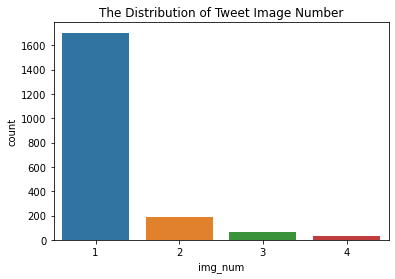

In [90]:
# Let's use countplot to get the distribution of the most frequent image number that corresponds 
# to the most confident prediction
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data.img_num)
plt.title('The Distribution of Tweet Image Number')

In [91]:
# Get the value count of each image number value
data.img_num.value_counts()

1    1704
2     190
3      62
4      30
Name: img_num, dtype: int64

The above graph shows that the most occcuring image number that corresponds to each tweet's most confident prediction is 1.

#### Question 2: What is the most popular dog stage according to the neural  network's image prediction?

Text(0.5, 1.0, 'The Distribution of Dog Stages')

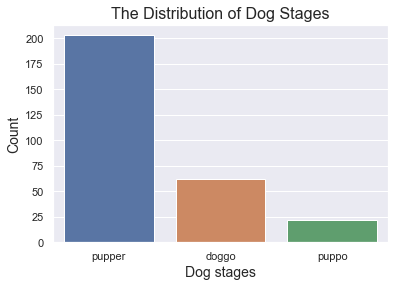

In [92]:
sns.set(style = 'darkgrid')
sorted_age = data['stage'].value_counts().head(3).index
sns.countplot(data = data, x ='stage', order = sorted_age, orient='h')
plt.xlabel('Dog stages', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('The Distribution of Dog Stages', fontsize=16)

In [93]:
# Get the value count of each dog stage
data.stage.value_counts()

pupper           203
doggo             62
puppo             22
doggo,pupper       9
floofer            7
doggo,puppo        1
doggo,floofer      1
Name: stage, dtype: int64

Looking at the distribution of dog images, it shows that 'pupper' (a small doggo, usually younger) is the most popular dog stage, followed by 'doggo' and 'puppo'. It could be due to the fact that young and unmatured dog is usually cuter than the adult dog. It should also be noticed that there's huge amount of missing data in the dog stages, thus the distribution may not reflect the truth.

#### Question 3: Does retweet count positively correlate with favourite count?

In [94]:
data.corr(method='pearson')

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,retweet_count,favorite_count
tweet_id,1.000000,0.023636,-0.022239,0.213122,0.104808,0.119029,-0.002334,0.122725,-0.047075,0.095884,0.384400,0.611906
rating_numerator,0.023636,1.000000,0.198240,-0.000710,-0.009088,-0.029155,-0.020821,-0.034695,-0.004158,-0.029360,0.018372,0.015925
rating_denominator,-0.022239,0.198240,1.000000,-0.004138,-0.004118,0.000814,-0.035112,-0.000625,0.006936,0.004879,-0.020186,-0.027127
img_num,0.213122,-0.000710,-0.004138,1.000000,0.204368,0.033054,-0.156451,0.052367,-0.141508,0.063166,0.103942,0.129638
p1_conf,0.104808,-0.009088,-0.004118,0.204368,1.000000,0.126237,-0.509900,0.140552,-0.707397,0.118610,0.048174,0.071011
p1_dog,0.119029,-0.029155,0.000814,0.033054,0.126237,1.000000,0.109993,0.636309,0.047051,0.557956,0.002680,0.043414
p2_conf,-0.002334,-0.020821,-0.035112,-0.156451,-0.509900,0.109993,1.000000,0.096556,0.481974,0.064349,-0.014019,-0.016490
p2_dog,0.122725,-0.034695,-0.000625,0.052367,0.140552,0.636309,0.096556,1.000000,0.035762,0.555094,0.013509,0.052560
p3_conf,-0.047075,-0.004158,0.006936,-0.141508,-0.707397,0.047051,0.481974,0.035762,1.000000,0.034034,-0.039137,-0.047438
p3_dog,0.095884,-0.029360,0.004879,0.063166,0.118610,0.557956,0.064349,0.555094,0.034034,1.000000,0.006180,0.034493



#### `retweet_count` is highly positively correlated with `favorite_Count`: r^2 = 0.928

C:\Users\DELL 5480\anaconda3\envs\StarNPMS\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='retweet_count', ylabel='favorite_count'>

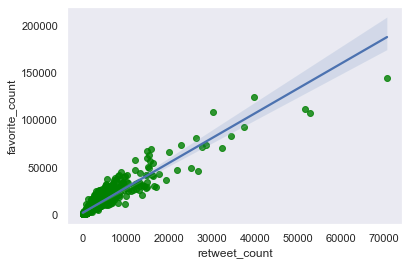

In [95]:
sns.set_style('dark')
sns.regplot(data.retweet_count, data.favorite_count, scatter_kws = {'color': 'Green'})

In the above plot, we are trying to check the linear relationship between retweet_count and favorite_count.

We see that there is a linear relationship between the two varibales. This doesn't mean that increase in retweet_count causes an increase in favorite_count but when you compare both linearly, there is a strong positive linear relation between retweet_count and favorite_Count.

The data used for the above `analysis` and `visualizations` is the final merged data which was later saved as twitter_archive_master.csv. 